In [1]:
from tictactoe import *
from tictactoe_helper import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## Train Expert X and Expert O

In [2]:
expertX = ttt_player('computer', 'X', epsilon=.9)
expertO = ttt_player('computer', 'O', epsilon=.9)

In [3]:
expertX_expertO_training_game = train_computer_players(expertX, expertO, n_games=200000)
expertX_expertO_train_scores, expertX_expertO_train_scores_agg = \
    compute_player_stats(expertX_expertO_training_game, 'playerO')

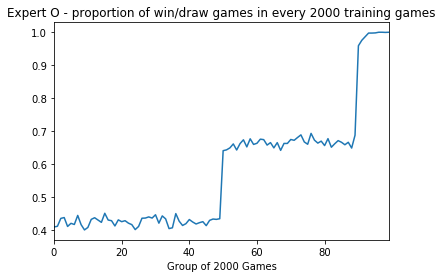

In [4]:
expertX_expertO_train_scores_agg.plot()
plt.title('Expert O - proportion of win/draw games in every 2000 training games')
plt.xlabel('Group of 2000 Games');

## Expert X and Expert O should tie every game

In [5]:
expertX.set_epsilon(0)
expertX.set_alpha(0)
expertO.set_epsilon(0)
expertO.set_alpha(0)

In [6]:
expertX_expertO_game = train_computer_players(expertX, expertO, n_games=2000,
                                              adj_pO_epsilon=False, adj_pX_epsilon=False)
expertX_expertO_scores, expertX_expertO_scores_agg = compute_player_stats(expertX_expertO_game, 'playerO')

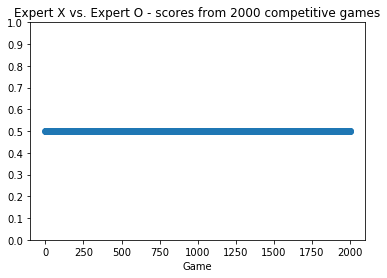

In [7]:
plt.scatter(np.arange(len(expertX_expertO_scores)), expertX_expertO_scores.score)
plt.ylim(0,1)
plt.yticks(np.arange(0,1.1,.1))
plt.xlabel('Game')
plt.title('Expert X vs. Expert O - scores from 2000 competitive games');

## How often does Expert O win against a Random X Player?

In [8]:
randomX = ttt_player('computer', 'X', epsilon=1)

In [ ]:
randomX_expertO_game = train_computer_players(randomX, expertO, n_games=20000,
                                              adj_pO_epsilon=False, adj_pX_epsilon=False)

In [20]:
randomX_expertO_scores, randomX_expertO_scores_agg = compute_player_stats(randomX_expertO_game, 'playerO')

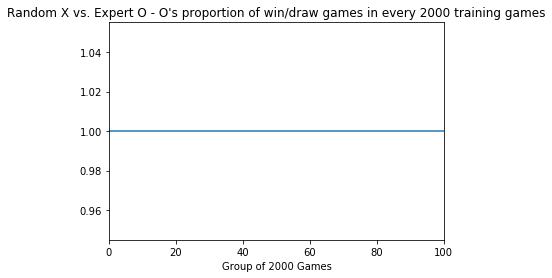

In [21]:
randomX_expertO_scores_agg.plot()
plt.title('Random X vs. Expert O - O\'s proportion of win/draw games in every 2000 training games')
plt.xlabel('Group of 2000 Games');

In [22]:
randomX_expertO_scores.score.value_counts(normalize=True)

1.0    0.779761
0.5    0.220239
Name: score, dtype: float64

In [13]:
# View game between the two

# randomX_expertO_game.reset()
# randomX_expertO_game.set_print(True)
# randomX_expertO_game.play()

## Train Apprentice O

In [27]:
apprenticeO = ttt_player('computer', 'O', epsilon=.9)

In [28]:
expertX_apprenticeO_training_game = train_computer_players(expertX, apprenticeO, adj_pX_epsilon=False)
expertX_apprenticeO_scores, expertX_apprenticeO_scores_agg = \
    compute_player_stats(expertX_apprenticeO_training_game, 'playerO')

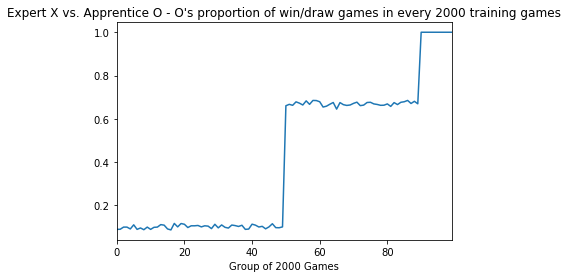

In [29]:
expertX_apprenticeO_scores_agg.plot()
plt.title('Expert X vs. Apprentice O - O\'s proportion of win/draw games in every 2000 training games')
plt.xlabel('Group of 2000 Games');

In [30]:
len(apprenticeO.policy)

444

## How often does Apprentice O win against a Random X Player?

In [31]:
apprenticeO.set_alpha(0)
apprenticeO.set_epsilon(0)

In [32]:
randomX_apprenticeO_game = train_computer_players(randomX, apprenticeO, n_games=20000,
                                              adj_pO_epsilon=False, adj_pX_epsilon=False)
randomX_apprenticeO_scores, randomX_apprenticeO_scores_agg = compute_player_stats(randomX_apprenticeO_game, 'playerO')

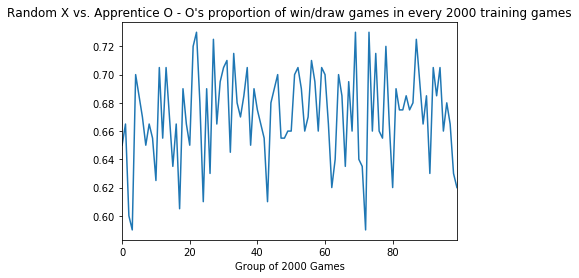

In [33]:
randomX_apprenticeO_scores_agg.plot()
plt.title('Random X vs. Apprentice O - O\'s proportion of win/draw games in every 2000 training games')
plt.xlabel('Group of 2000 Games');

In [34]:
randomX_apprenticeO_scores.score.value_counts(normalize=True)

1.0    0.5379
0.0    0.3285
0.5    0.1336
Name: score, dtype: float64

## Can I train a better O Player if I have Expert X explore?

In [36]:
challengerO = ttt_player('computer', 'O', epsilon=.9)

In [37]:
expertX_challengerO_training_game = train_computer_players(expertX, challengerO, n_games=200000)
expertX_challengerO_train_scores, expertX_challengerO_train_scores_agg = \
    compute_player_stats(expertX_challengerO_training_game, 'playerO')

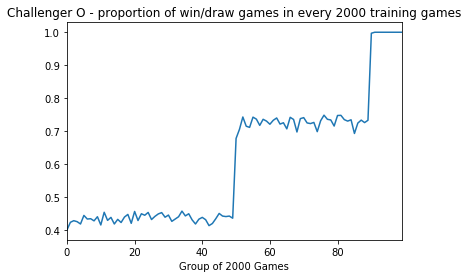

In [38]:
expertX_challengerO_train_scores_agg.plot()
plt.title('Challenger O - proportion of win/draw games in every 2000 training games')
plt.xlabel('Group of 2000 Games');

## Challenger O should do much better against Random X

In [39]:
challengerO.set_alpha(0)
challengerO.set_epsilon(0)

In [40]:
randomX_challengerO_game = train_computer_players(randomX, challengerO, n_games=20000,
                                              adj_pO_epsilon=False, adj_pX_epsilon=False)
randomX_challengerO_scores, randomX_challengerO_scores_agg = compute_player_stats(randomX_challengerO_game, 'playerO')

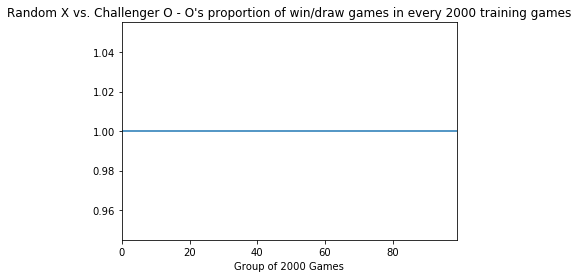

In [41]:
randomX_challengerO_scores_agg.plot()
plt.title('Random X vs. Challenger O - O\'s proportion of win/draw games in every 2000 training games')
plt.xlabel('Group of 2000 Games');

In [42]:
randomX_challengerO_scores.score.value_counts(normalize=True)

1.0    0.88365
0.5    0.11635
Name: score, dtype: float64